<a href="https://colab.research.google.com/github/nowshaba/Intrusion-Detection/blob/main/WEbsite_spoofing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
import sklearn.metrics as m
import keras
import tensorflow as tf
import sklearn
import tensorboard

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Avoid warnings
import warnings
warnings.filterwarnings('ignore')
#Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Import  Data
j=0
n=0
#to check whih files have both attack and normal labels
for j in range(0,54):
  df3=pd.read_csv("/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/13.Website_spoofing/Website_spoofing_"+str(j)+".csv")
  j+1
  for i in df3['Label']:
    if (i=='Website_spoofing'):
      n=1
  if (n==1):
    print("n is",n, "and j is",j)

n is 1 and j is 0
n is 1 and j is 1
n is 1 and j is 2
n is 1 and j is 3
n is 1 and j is 4
n is 1 and j is 5
n is 1 and j is 6
n is 1 and j is 7
n is 1 and j is 8
n is 1 and j is 9
n is 1 and j is 10
n is 1 and j is 11
n is 1 and j is 12
n is 1 and j is 13
n is 1 and j is 14
n is 1 and j is 15
n is 1 and j is 16
n is 1 and j is 17
n is 1 and j is 18
n is 1 and j is 19
n is 1 and j is 20
n is 1 and j is 21
n is 1 and j is 22
n is 1 and j is 23
n is 1 and j is 24
n is 1 and j is 25
n is 1 and j is 26
n is 1 and j is 27
n is 1 and j is 28
n is 1 and j is 29
n is 1 and j is 30
n is 1 and j is 31
n is 1 and j is 32
n is 1 and j is 33
n is 1 and j is 34
n is 1 and j is 35
n is 1 and j is 36
n is 1 and j is 37
n is 1 and j is 38
n is 1 and j is 39
n is 1 and j is 40
n is 1 and j is 41
n is 1 and j is 42
n is 1 and j is 43
n is 1 and j is 44
n is 1 and j is 45
n is 1 and j is 46
n is 1 and j is 47
n is 1 and j is 48
n is 1 and j is 49
n is 1 and j is 50
n is 1 and j is 51
n is 1 and j is 52
n i

In [ ]:
#much better than this is to put all the desired csv files in this case from 21 to 32 in one folder and use GLOB to put them in one df
df1 = pd.concat(
    map(pd.read_csv,["/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/13.Website_spoofing/Website_spoofing_28.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/13.Website_spoofing/Website_spoofing_29.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/13.Website_spoofing/Website_spoofing_30.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/13.Website_spoofing/Website_spoofing_31.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/13.Website_spoofing/Website_spoofing_32.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/13.Website_spoofing/Website_spoofing_33.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/13.Website_spoofing/Website_spoofing_34.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/13.Website_spoofing/Website_spoofing_35.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/13.Website_spoofing/Website_spoofing_36.csv"]), ignore_index=True)

In [ ]:
drop_cols = []
for i in df1.columns:
    if len(df1[i].unique())==1:
        drop_cols.append(i)
print("Total columns with only 1 unique value:", len(drop_cols))
df1.drop(drop_cols, 1, inplace=True)

print(df1.columns)
df1.replace([np.inf, -np.inf], 0, inplace=True)
df1.fillna(0, inplace = True)

Total columns with only 1 unique value: 85
Index(['frame.len', 'frame.number', 'frame.time', 'frame.time_delta',
       'frame.time_delta_displayed', 'frame.time_epoch', 'frame.time_relative',
       'radiotap.datarate', 'radiotap.dbm_antsignal', 'radiotap.length',
       ...
       'tls.alert_message.level', 'tls.app_data_proto',
       'tls.compress_certificate.compressed_certificate_message.length',
       'tls.handshake.extension.type',
       'tls.handshake.extensions_key_share_group',
       'tls.handshake.session_ticket_length', 'tls.handshake.version',
       'tls.record.content_type', 'tls.record.version', 'Label'],
      dtype='object', length=169)


In [ ]:
df1.dropna(1,inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Columns: 169 entries, frame.len to Label
dtypes: float64(37), int64(18), object(114)
memory usage: 580.2+ MB


In [ ]:
#much better than this is to put all the desired csv files in this case from 21 to 32 in one folder and use GLOB to put them in one df
df2 = pd.concat(
    map(pd.read_csv,["/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/13.Website_spoofing/Website_spoofing_37.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/13.Website_spoofing/Website_spoofing_38.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/13.Website_spoofing/Website_spoofing_39.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/13.Website_spoofing/Website_spoofing_40.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/13.Website_spoofing/Website_spoofing_41.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/13.Website_spoofing/Website_spoofing_42.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/13.Website_spoofing/Website_spoofing_43.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/13.Website_spoofing/Website_spoofing_44.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/13.Website_spoofing/Website_spoofing_45.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/13.Website_spoofing/Website_spoofing_46.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/13.Website_spoofing/Website_spoofing_47.csv"]), ignore_index=True)

In [ ]:
drop_cols = []
for i in df2.columns:
    if len(df2[i].unique())==1:
        drop_cols.append(i)
print("Total columns with only 1 unique value:", len(drop_cols))
df2.drop(drop_cols, 1, inplace=True)

print(df2.columns)
df2.replace([np.inf, -np.inf], 0, inplace=True)
df2.fillna(0, inplace = True)

Total columns with only 1 unique value: 103
Index(['frame.len', 'frame.number', 'frame.time', 'frame.time_delta',
       'frame.time_delta_displayed', 'frame.time_epoch', 'frame.time_relative',
       'radiotap.datarate', 'radiotap.dbm_antsignal', 'radiotap.length',
       ...
       'tls.alert_message.level', 'tls.app_data_proto',
       'tls.compress_certificate.compressed_certificate_message.length',
       'tls.handshake.extension.type',
       'tls.handshake.extensions_key_share_group',
       'tls.handshake.session_ticket_length', 'tls.handshake.version',
       'tls.record.content_type', 'tls.record.version', 'Label'],
      dtype='object', length=151)


In [ ]:
df2.dropna(1,inplace=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549998 entries, 0 to 549997
Columns: 151 entries, frame.len to Label
dtypes: float64(26), int64(17), object(108)
memory usage: 633.6+ MB


In [ ]:
#much better than this is to put all the desired csv files in this case from 21 to 32 in one folder and use GLOB to put them in one df
df3 = pd.concat(
    map(pd.read_csv,["/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/13.Website_spoofing/Website_spoofing_48.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/13.Website_spoofing/Website_spoofing_49.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/13.Website_spoofing/Website_spoofing_50.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/13.Website_spoofing/Website_spoofing_51.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/13.Website_spoofing/Website_spoofing_52.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/13.Website_spoofing/Website_spoofing_53.csv"]), ignore_index=True)

In [ ]:
drop_cols = []
for i in df3.columns:
    if len(df3[i].unique())==1:
        drop_cols.append(i)
print("Total columns with only 1 unique value:", len(drop_cols))
df3.drop(drop_cols, 1, inplace=True)

print(df3.columns)
df3.replace([np.inf, -np.inf], 0, inplace=True)
df3.fillna(0, inplace = True)

Total columns with only 1 unique value: 100
Index(['frame.len', 'frame.number', 'frame.time', 'frame.time_delta',
       'frame.time_delta_displayed', 'frame.time_epoch', 'frame.time_relative',
       'radiotap.datarate', 'radiotap.dbm_antsignal', 'radiotap.length',
       ...
       'tls.alert_message.level', 'tls.app_data_proto',
       'tls.compress_certificate.compressed_certificate_message.length',
       'tls.handshake.extension.type',
       'tls.handshake.extensions_key_share_group',
       'tls.handshake.session_ticket_length', 'tls.handshake.version',
       'tls.record.content_type', 'tls.record.version', 'Label'],
      dtype='object', length=154)


In [ ]:
df3.dropna(1,inplace=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268581 entries, 0 to 268580
Columns: 154 entries, frame.len to Label
dtypes: float64(30), int64(18), object(106)
memory usage: 315.6+ MB


In [ ]:
df=pd.concat([df1, df2, df3], axis=0, ignore_index=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268579 entries, 0 to 1268578
Columns: 170 entries, frame.len to ldap
dtypes: float64(34), int64(17), object(119)
memory usage: 1.6+ GB


In [ ]:
df.dropna(1, how = 'all', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268579 entries, 0 to 1268578
Columns: 170 entries, frame.len to ldap
dtypes: float64(34), int64(17), object(119)
memory usage: 1.6+ GB


In [ ]:
 df.replace([np.inf, -np.inf], 0, inplace=True)
 df.fillna(0, inplace = True)
 

In [ ]:
df = df[df.Label != 0]
#to remove labels that had NaN value which was replaced by zero above.

In [ ]:
#Split dataset on train and test
from sklearn.model_selection import train_test_split
train, test=train_test_split(df,test_size=0.3, random_state=10)

#Exploratory Analysis
# Descriptive statistics
train.describe()
test.describe()
train['Label'].value_counts()
test['Label'].value_counts()

Normal              278013
Website_spoofing    102561
Name: Label, dtype: int64

In [ ]:
#Scalling numerical attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [ ]:
from sklearn.preprocessing import OneHotEncoder 

#creating one hot encoder object 
onehotencoder = OneHotEncoder() 

trainDep = train['Label'].values.reshape(-1,1)
trainDep = onehotencoder.fit_transform(trainDep).toarray()
testDep = test['Label'].values.reshape(-1,1)
testDep = onehotencoder.fit_transform(testDep).toarray()

In [ ]:
train_X=sc_traindf
train_y=trainDep[:,0]

test_X=sc_testdf
test_y=testDep[:,0]

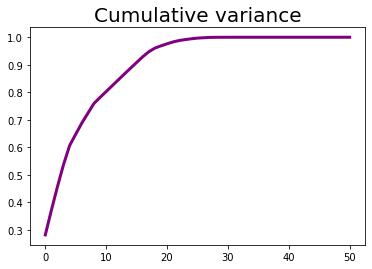

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(train_X)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#800080')
plt.title('Cumulative variance', size=20)
plt.show()

In [ ]:
Loads = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(train_X.columns) + 1)],
    index=train_X.columns
)
Loads.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51
frame.len,0.447341,0.244458,-0.119258,-0.001924,-0.701323,-0.071636,-0.082439,0.068427,-0.118951,-0.020618,-0.006928,-0.000947,-0.001744,-0.006662,-0.015041,0.006533,0.000917,0.066190,0.259236,0.047960,-0.079178,0.034414,0.305606,-0.000878,-0.147646,-0.007239,-0.003286,-0.076375,0.008184,-0.000252,0.000340,-0.000010,0.000076,-2.033751e-06,-1.120235e-06,6.077759e-07,4.702846e-09,-5.082187e-10,1.123935e-11,1.078243e-18,-9.408384e-31,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00
frame.number,0.003785,-0.305414,0.921633,0.081152,-0.222438,-0.007822,-0.007247,0.005451,-0.006689,-0.001999,0.000869,0.000630,0.000579,-0.000217,-0.000549,0.003439,-0.001714,0.001760,-0.006326,0.000285,-0.000379,0.000379,-0.000054,-0.000008,0.001633,0.000340,0.000018,0.000274,0.000459,0.000556,-0.000799,0.031304,0.000140,-3.249270e-05,2.640587e-06,-7.687586e-05,2.334109e-07,1.274792e-07,-4.979857e-11,-7.687011e-19,-1.555032e-31,-5.008634e-31,2.141742e-32,-1.064634e-31,-3.544549e-31,9.906283e-32,1.398264e-31,6.286894e-34,5.039108e-33,-4.428009e-33,-2.109848e-32
frame.time_delta,-0.042772,0.281407,0.085690,0.006487,-0.063227,0.886087,0.288244,0.132621,-0.110745,-0.011509,-0.000584,0.000529,-0.000160,0.001211,-0.095614,0.004755,-0.001778,0.004426,-0.009183,-0.005301,-0.003359,0.000913,0.007795,-0.000030,0.002311,-0.000015,0.000015,-0.000178,0.000011,0.000050,-0.000022,-0.000003,0.000005,3.725094e-07,-2.338598e-08,8.208594e-09,1.035111e-09,-3.159992e-08,-3.902113e-13,-1.188271e-18,4.774547e-16,4.545761e-17,1.254801e-16,-1.479091e-17,2.761683e-17,1.879008e-17,3.479202e-18,-8.132277e-25,1.342524e-30,1.657705e-31,4.544060e-17
frame.time_delta_displayed,-0.042772,0.281407,0.085690,0.006487,-0.063227,0.886087,0.288244,0.132621,-0.110745,-0.011509,-0.000584,0.000529,-0.000160,0.001211,-0.095614,0.004755,-0.001778,0.004426,-0.009183,-0.005301,-0.003359,0.000913,0.007795,-0.000030,0.002311,-0.000015,0.000015,-0.000178,0.000011,0.000050,-0.000022,-0.000003,0.000005,3.725094e-07,-2.338598e-08,8.208594e-09,1.035111e-09,-3.159992e-08,-3.899918e-13,1.263648e-18,-4.774547e-16,-4.545761e-17,-1.254801e-16,1.479091e-17,-2.761683e-17,-1.879008e-17,-3.479202e-18,8.132277e-25,-1.342432e-30,-1.658433e-31,-4.544060e-17
frame.time_epoch,0.004943,-0.305353,0.922057,0.081436,-0.222537,-0.007677,-0.007433,0.005583,-0.007144,-0.001981,0.001354,0.000592,0.000593,-0.000181,-0.000216,0.004900,-0.002586,-0.000028,-0.002982,0.000159,0.000514,-0.000164,-0.002680,-0.000023,0.001277,0.000321,-0.000043,-0.000917,0.000290,0.000057,0.000443,-0.010896,-0.000158,3.282152e-05,-8.400032e-06,-4.532163e-03,1.094680e-05,1.467809e-06,7.717787e-11,-6.574675e-18,1.072566e-29,3.690645e-30,1.436413e-30,-1.044372e-30,-1.562541e-30,2.357871e-31,2.685241e-31,-6.155713e-33,9.827913e-33,-3.669786e-32,1.020112e-30


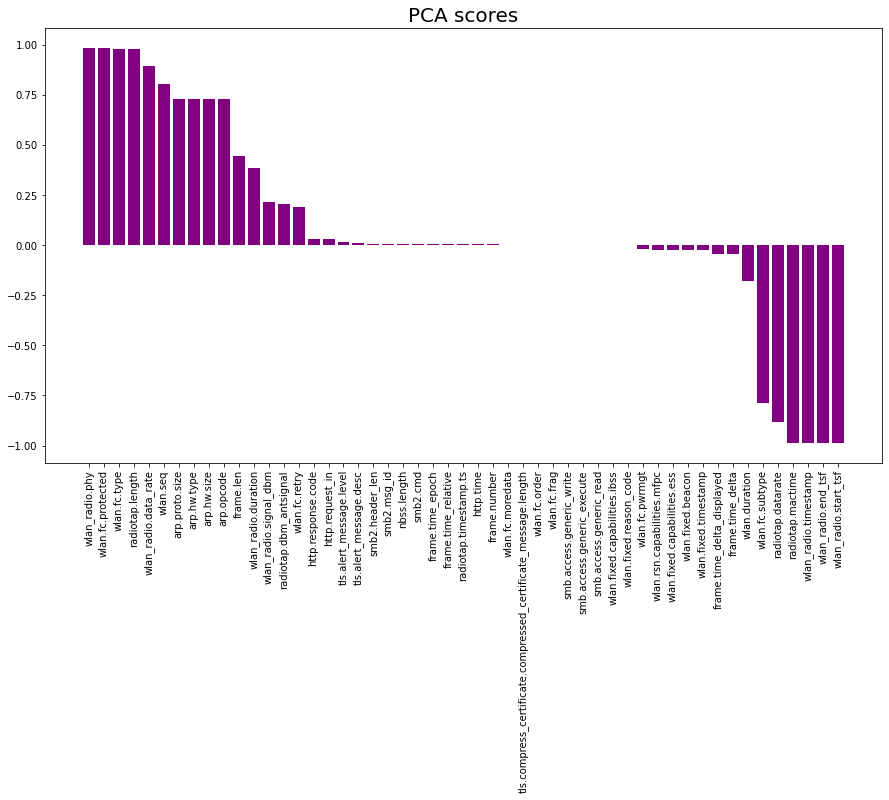

In [ ]:
pc1_Loads = Loads.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_Loads = pc1_Loads.reset_index()
pc1_Loads.columns = ['Feature', 'CorrelationtoPC1']
plt.rcParams["figure.figsize"] = (15,8)
plt.bar(x=pc1_Loads['Feature'], height=pc1_Loads['CorrelationtoPC1'], color='#800080')
plt.title('PCA scores', size=20)
plt.xticks(rotation='vertical')
plt.show()